# Visualisation Binary results

In this section I show the results for: Mutual Information, Maximal Leakage and (Maximal) Alpha-Leakage for the binary data experiment

In [16]:
## Extra needed packages:
# Pandas
# Matplotlib

# !pip install pandas matplotlib

In [17]:
results_path = "results/correct_binary_results/"

In [18]:
import json
import os

# Not the cleanest code, but works for now...
UNCORRELATED = 'uncorrelated'
CORRELATED = 'correlated'
RANDOM = 'random'
    
file_names_dict = {
    'correlated_mi': [],
    'correlated_maxl': [],
    'correlated_alpha': [],
    
    'uncorrelated_mi': [],
    'uncorrelated_maxl': [],
    'uncorrelated_alpha': [],
    
    'random_mi': [],
    'random_maxl': [],
    'random_alpha': [],
}

def add_to_list(file_name, data_type):
    file_path = os.path.join(results_path, file_name)
    with open(file_path) as json_file:
        if 'maxl' in file:
            file_names_dict[data_type + '_maxl'].append(json.load(json_file))
        elif 'alpha' in file:
            file_names_dict[data_type + '_alpha'].append(json.load(json_file))
        else:
            file_names_dict[data_type + '_mi'].append(json.load(json_file))


print("Loading to dictionary...")
for file in os.listdir(results_path):
    if UNCORRELATED in file:
        add_to_list(file, UNCORRELATED)
    elif RANDOM in file:
        add_to_list(file, RANDOM)
    else:
        add_to_list(file, CORRELATED)
print("Loading complete.")

Loading to dictionary...
Loading complete.


In [19]:
len(file_names_dict['random_mi'])

1

In [20]:
import numpy as np

def get_deltas_lambdas(file_name):
    deltas = list(file_names_dict[file_name][0].keys())
    lambdas = list(file_names_dict[file_name][0][deltas[0]].keys())
    return (deltas, lambdas)

def get_stats_for_file(file_name):
    '''
    Only works for Maximal Leakage and Mutual Information result sets. Alpha-Leakage needs other approach.
    '''
    (deltas,lambdas) = get_deltas_lambdas(file_name)
    privacy_leakage_train = []
    public_leakage_train = []
    distortion_train = []
    
    privacy_leakage_test = []
    public_leakage_test = []
    distortion_test = []
    
    file_dict = file_names_dict[file_name][0]
    for delta in deltas:
        privacy_leakage_train.append(file_dict[delta][lambdas[0]]['train']['E[MI_ZX]'])
        public_leakage_train.append(file_dict[delta][lambdas[0]]['train']['E[MI_ZY]'])
        distortion_train.append(file_dict[delta][lambdas[0]]['train']['E[hamm(x,y)]'])
        
        privacy_leakage_test.append(file_dict[delta][lambdas[0]]['test']['E[MI_ZX]'])
        public_leakage_test.append(file_dict[delta][lambdas[0]]['test']['E[MI_ZY]'])
        distortion_test.append(file_dict[delta][lambdas[0]]['test']['E[hamm(x,y)]'])
    
    deltas = np.around(np.array(deltas, dtype=np.double), 2)
    
    privacy_leakage_train = np.array(privacy_leakage_train)
    public_leakage_train = np.array(public_leakage_train)
    distortion_train = np.array(distortion_train)
    
    privacy_leakage_test = np.array(privacy_leakage_test)
    public_leakage_test = np.array(public_leakage_test)
    distortion_test = np.array(distortion_test)
    
    return (
        np.c_[deltas, privacy_leakage_train, public_leakage_train, distortion_train],
        np.c_[deltas, privacy_leakage_test, public_leakage_test, distortion_test]
    )
    
# (train, test) = get_stats_for_file('correlated_mi')

# Convert to pandas

In [21]:
import pandas as pd

def convert_to_pandas(nd_array):
    return pd.DataFrame(data=nd_array, columns=['delta','E[MI_ZX]', 'E[MI_ZY]', 'E[hamm(x,y)]'])

# convert_to_pandas(train)

# Start plotting

# Inspecting Mutual Information loss

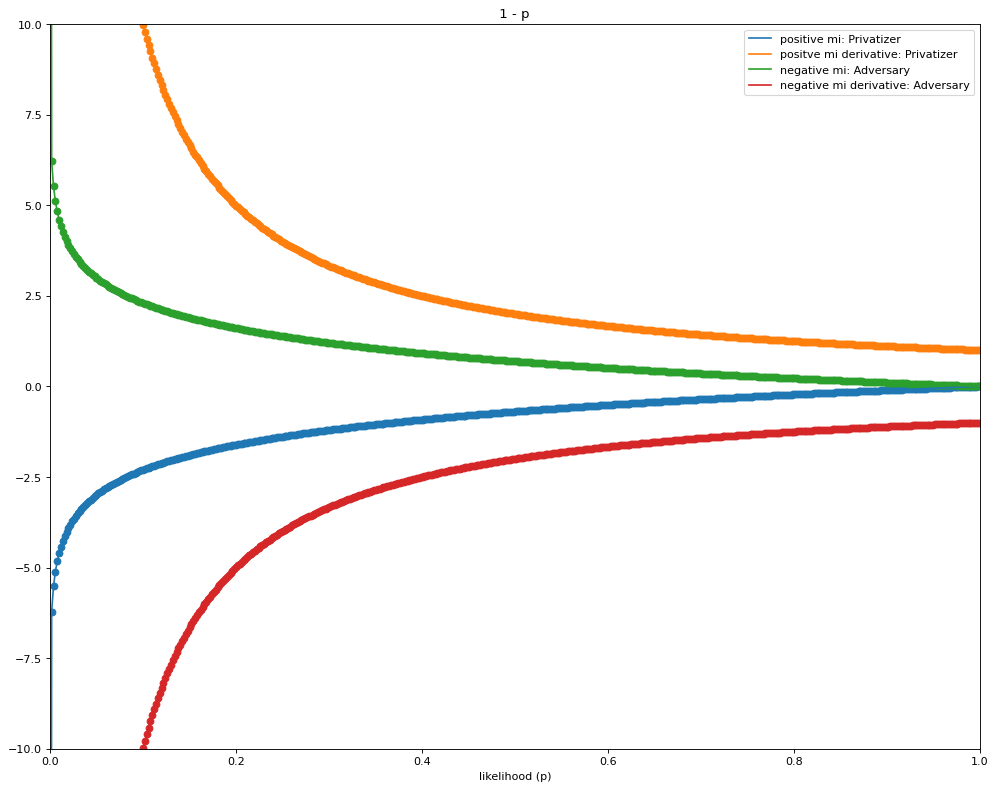

In [22]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import math

def mi(p):
    return np.log(p)

def mi_der(p):
    return 1/p

xlim = 1
probs = np.linspace(1e-25, xlim, 500)

figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

x = probs
y1 = np.array([mi(p) for p in probs])
y2 = np.array([-mi(p) for p in probs])

y3 = np.array([mi_der(p) for p in probs])
y4 = np.array([-mi_der(p) for p in probs])

plt.plot(x,y1, label='positive mi: Privatizer')
plt.scatter(x,y1)

plt.plot(x,y3, label='positve mi derivative: Privatizer')
plt.scatter(x,y3)

plt.plot(x,y2, label='negative mi: Adversary')
plt.scatter(x,y2)

plt.plot(x,y4, label='negative mi derivative: Adversary')
plt.scatter(x,y4)

plt.xlim([0,xlim])
plt.ylim([-10,10])
plt.xlabel('likelihood (p)')
plt.title(' 1 - p ')
plt.legend()
    
# plt.savefig('alpha_behavior_zoomout.png')

# Inspect Maximal Leakage

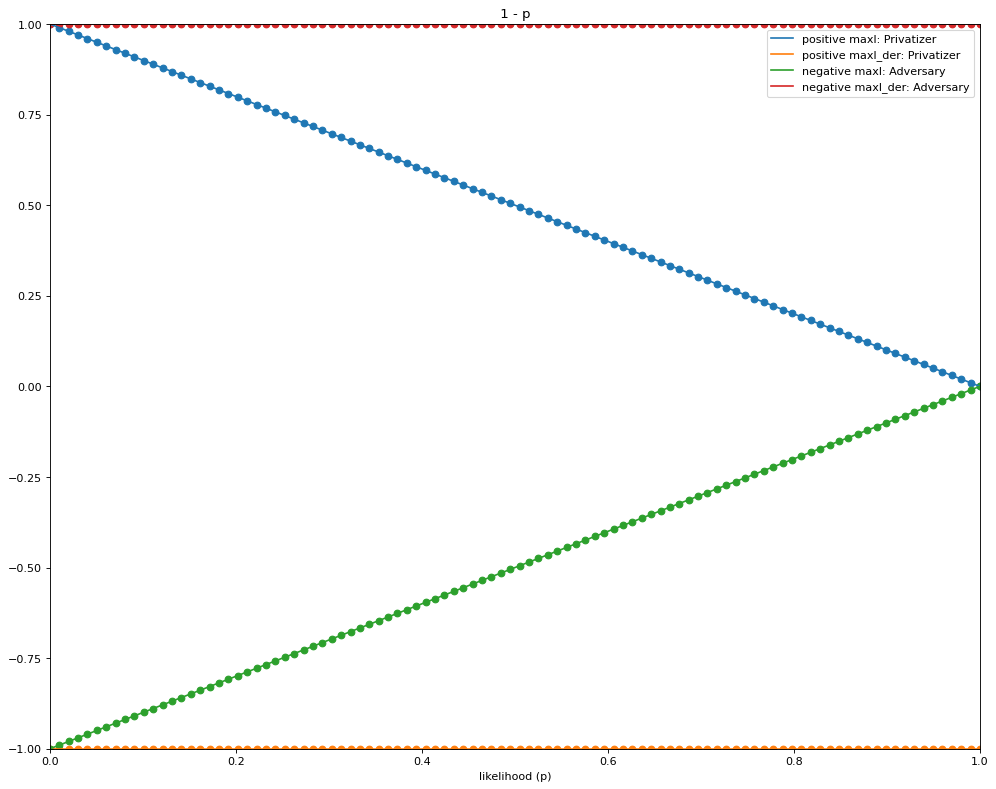

In [23]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import math

def maxl(p):
    return 1 - p

def maxl_der(p):
    return -1

xlim = 1
probs = np.linspace(1e-25, xlim, 100)

figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

x = probs
y1 = np.array([maxl(p) for p in probs])
y2 = np.array([-maxl(p) for p in probs])
y3 = np.array([maxl_der(p) for p in probs])
y4 = np.array([-maxl_der(p) for p in probs])

plt.plot(x,y1, label='positive maxl: Privatizer')
plt.scatter(x,y1)

plt.plot(x,y3,label='positive maxl_der: Privatizer')
plt.scatter(x,y3)

plt.plot(x,y2, label='negative maxl: Adversary')
plt.scatter(x,y2)

plt.plot(x,y4,label='negative maxl_der: Adversary')
plt.scatter(x,y4)


plt.xlim([0,xlim])
plt.ylim([-1,1])
plt.xlabel('likelihood (p)')
plt.title(' 1 - p ')
plt.legend()
    
# plt.savefig('alpha_behavior_zoomout.png')

In [24]:
######### Mutual Information

(train_correlated_mi, test_correlated_mi) = get_stats_for_file('correlated_mi')
(train_correlated_mi_df, test_correlated_mi_df) = (convert_to_pandas(train_correlated_mi), convert_to_pandas(test_correlated_mi))

(train_uncorrelated_mi, test_uncorrelated_mi) = get_stats_for_file('uncorrelated_mi')
(train_uncorrelated_mi_df, test_uncorrelated_mi_df) = (convert_to_pandas(train_uncorrelated_mi), convert_to_pandas(test_uncorrelated_mi))

(train_random_mi, test_random_mi) = get_stats_for_file('random_mi')
(train_random_mi_df, test_random_mi_df) = (convert_to_pandas(train_random_mi), convert_to_pandas(test_random_mi))

######### Maximal Leakage

(train_correlated_maxl, test_correlated_maxl) = get_stats_for_file('correlated_maxl')
(train_correlated_maxl_df, test_correlated_maxl_df) = (convert_to_pandas(train_correlated_maxl), convert_to_pandas(test_correlated_maxl))

(train_uncorrelated_maxl, test_uncorrelated_maxl) = get_stats_for_file('uncorrelated_maxl')
(train_uncorrelated_maxl_df, test_uncorrelated_maxl_df) = (convert_to_pandas(train_uncorrelated_maxl), convert_to_pandas(test_uncorrelated_maxl))

(train_random_maxl, test_random_maxl) = get_stats_for_file('random_maxl')
(train_random_maxl_df, test_random_maxl_df) = (convert_to_pandas(train_random_maxl), convert_to_pandas(test_random_maxl))

KeyError: 'train'

In [25]:
test_uncorrelated_mi_df

NameError: name 'test_uncorrelated_mi_df' is not defined

## We create two plots for two purposes
- The first plot is the plot of I(X;Z) and hamm(Y,Z). This shows the tradeoff between privacy and utility
- The second plot is the plot of np.linspace(1,0,11). This shows to what extend the network can meet with the set constraints. Ideally we get a straight linear map.

In [27]:
import matplotlib.pyplot as plt

def compute_constraint_error(df):
    y = df['delta'].to_numpy()
    yhat = df['E[hamm(x,y)]'].to_numpy()
    
    return (y-yhat).mean()

def plot_privacy_utility_tradeoff(axs, df, name, train_or_test, alpha=1, linestyle='solid'):
    x = df['E[hamm(x,y)]']
    y = df['E[MI_ZX]']
    z = df['delta']
#     print(y)
    axs.plot(z,y, label='I(X;Z)_' + train_or_test, alpha=alpha, linestyle=linestyle)
    axs.plot(z,x, label='hamm(Y;Z)_' + train_or_test, alpha=alpha, linestyle=linestyle)
    axs.set_xlim([0,1])
    axs.set_ylim([0,1])
    axs.scatter(z,y)
    axs.scatter(z,x)
    axs.set_xlabel('delta-constraint')
    axs.set_title('{} data'.format(name))
    axs.legend()

NameError: name 'train_correlated_mi_df' is not defined

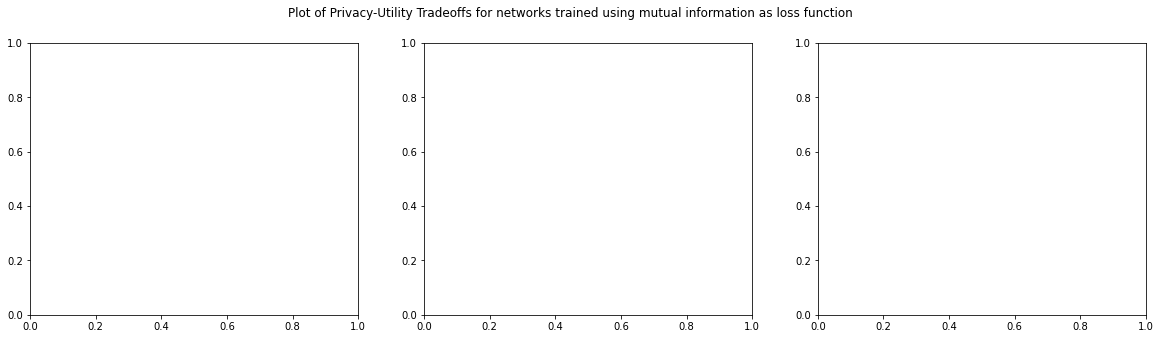

In [28]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Plot of Privacy-Utility Tradeoffs for networks trained using mutual information as loss function')
fig.set_figheight(5)
fig.set_figwidth(20)

plot_privacy_utility_tradeoff(axs[0], train_correlated_mi_df, 'Correlated', 'train')
plot_privacy_utility_tradeoff(axs[1], train_uncorrelated_mi_df, 'Uncorrelated', 'train')
plot_privacy_utility_tradeoff(axs[2], train_random_mi_df, 'Random', 'train')

plot_privacy_utility_tradeoff(axs[0], test_correlated_mi_df, 'Correlated', 'test')
plot_privacy_utility_tradeoff(axs[1], test_uncorrelated_mi_df, 'Uncorrelated', 'test')
plot_privacy_utility_tradeoff(axs[2], test_random_mi_df, 'Random', 'test')

axs[0].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[1].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[2].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.savefig('binary_mutual_information_plots.png')
print('Constraint error correlated: {}'.format(compute_constraint_error(test_correlated_mi_df)))
print('Constraint error uncorrelated: {}'.format(compute_constraint_error(test_uncorrelated_mi_df)))
print('Constraint error random: {}'.format(compute_constraint_error(test_random_mi_df)))

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Plot of Privacy-Utility Tradeoffs for networks trained using Maximal Leakage as loss function.')
fig.set_figheight(5)
fig.set_figwidth(20)

plot_privacy_utility_tradeoff(axs[0], train_correlated_maxl_df, 'Correlated', 'train')
plot_privacy_utility_tradeoff(axs[1], train_uncorrelated_maxl_df, 'Uncorrelated', 'train')
plot_privacy_utility_tradeoff(axs[2], train_random_maxl_df, 'Random', 'train')

plot_privacy_utility_tradeoff(axs[0], test_correlated_maxl_df, 'Correlated', 'test')
plot_privacy_utility_tradeoff(axs[1], test_uncorrelated_maxl_df, 'Uncorrelated', 'test')
plot_privacy_utility_tradeoff(axs[2], test_random_maxl_df, 'Random', 'test')

axs[0].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[1].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[2].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.savefig('binary_maximal_leakage_plots.png')
print('Constraint error correlated: {}'.format(compute_constraint_error(test_correlated_maxl_df)))
print('Constraint error uncorrelated: {}'.format(compute_constraint_error(test_uncorrelated_maxl_df)))
print('Constraint error random: {}'.format(compute_constraint_error(test_random_maxl_df)))

# Comparing Maximal Leakage and Mutual Information

NameError: name 'test_correlated_mi_df' is not defined

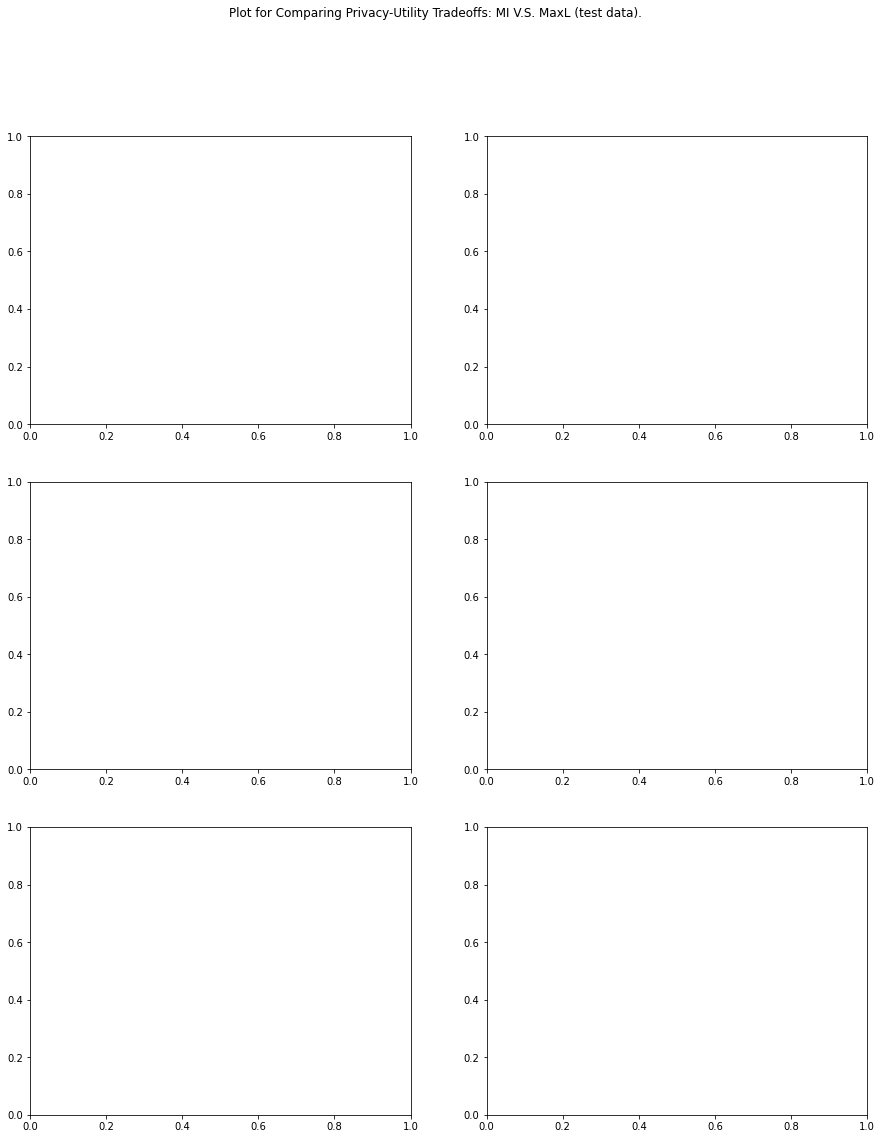

In [29]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Plot for Comparing Privacy-Utility Tradeoffs: MI V.S. MaxL (test data).')
fig.set_figheight(18)
fig.set_figwidth(15)

plot_privacy_utility_tradeoff(axs[0,0], test_correlated_mi_df, 'Correlated & MI', '')
plot_privacy_utility_tradeoff(axs[0,1], test_correlated_maxl_df, 'Correlated & MaxL', '')

plot_privacy_utility_tradeoff(axs[1,0], test_uncorrelated_mi_df, 'Uncorrelated & MI', '')
plot_privacy_utility_tradeoff(axs[1,1], test_uncorrelated_maxl_df, 'Uncorrelated & MaxL', '')

plot_privacy_utility_tradeoff(axs[2,0], test_random_mi_df, 'Random & MI', '')
plot_privacy_utility_tradeoff(axs[2,1], test_random_maxl_df, 'Random & MaxL', '')

axs[0,0].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[0,0].legend()
axs[0,1].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[0,1].legend()
axs[1,0].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[1,0].legend()
axs[1,1].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[1,1].legend()
axs[2,0].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[2,0].legend()
axs[2,1].plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
axs[2,1].legend()

fig.savefig('binary_comparing_maxl_mi_plots.png')

# Alpha Criterion Behavior

In [ ]:
import math

def alpha_loss(a, p):
    return (a / (a - 1)) * (1 - np.power(p, ( (a - 1) / a )))

xlim = 1
probs = np.linspace(1e-25, xlim, 100)
alphas = np.array([1.005, 1.01, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 2])

ys = np.array([alpha_loss(a, p) for a in alphas for p in probs]).reshape(alphas.shape[0], probs.shape[0])
y = np.array([alpha_loss(1.005, p) for p in probs])
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
# print(probs)
for (i,a) in enumerate(alphas):
    x = probs
    y = ys[i, :]
    plt.plot(x,y, label='a=' + str(a))
    plt.scatter(x,y)
    plt.xlim([0,xlim])
    plt.ylim([0,10])
    plt.xlabel('likelihood (p)')
    plt.title('Alpha function behavior: (a / (a - 1)) * (1 - p ^ ( (a - 1) / a ))) ^ 2')
    plt.legend()
    
plt.savefig('alpha_behavior.png')

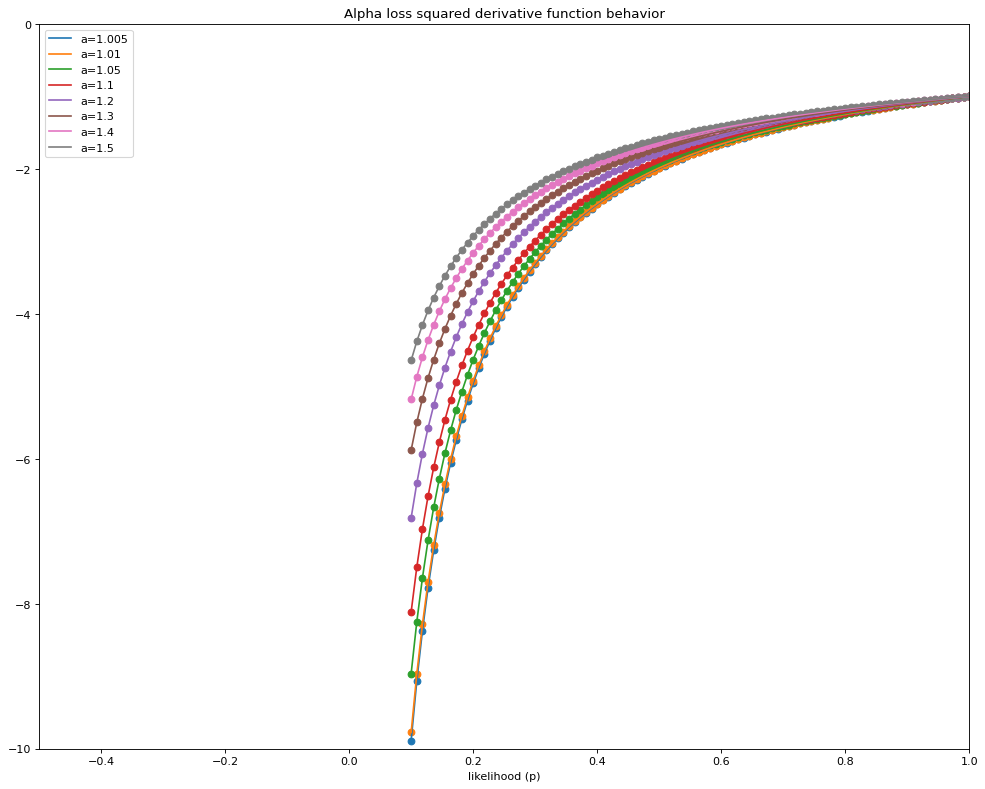

In [30]:
def alpha_loss_der(a, p):
#     -x^{-\frac{1}{a}}
    return - np.power(p, (-1)/ a )

probs = np.linspace(0.1, xlim, 100)

ys = np.array([alpha_loss_der(a, p) for a in alphas for p in probs]).reshape(alphas.shape[0], probs.shape[0])
y = np.array([alpha_loss_der(1.005, p) for p in probs])
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
# print(alpha_loss_der(1.0005,1.00000e-06))
for (i,a) in enumerate(alphas[:-1]):
    x = probs
    y = ys[i, :]
    plt.plot(x,y, label='a=' + str(a))
    plt.scatter(x,y)
    plt.xlim([-0.5,xlim])
    plt.ylim([-10,0])
    plt.xlabel('likelihood (p)')
    plt.title('Alpha loss squared derivative function behavior')
    plt.legend()
    
plt.savefig('alpha_derivative_behavior.png')

# Alpha files

In [31]:
def get_alphas_deltas_lambdas_for_file(file_name):
    alphas = list(file_names_dict[file_name][0].keys())
    deltas = list(file_names_dict[file_name][0][alphas[0]].keys())
    lambdas = list(file_names_dict[file_name][0][alphas[0]][deltas[0]].keys())
    return (alphas, deltas, lambdas)

def get_stats_for_alpha_file(file_name):
    '''
    Only works for Maximal Leakage and Mutual Information result sets. Alpha-Leakage needs other approach.
    '''
    (alphas,deltas,lambdas) = get_alphas_deltas_lambdas_for_file(file_name)
    
    privacy_leakage_train = []
    public_leakage_train = []
    distortion_train = []
    
    privacy_leakage_test = []
    public_leakage_test = []
    distortion_test = []
    
    alphas_2 = []
    deltas_2 = [] 
    
    file_dict = file_names_dict[file_name][0]
    for a in alphas:
        for delta in deltas:
            privacy_leakage_train.append(file_dict[a][delta][lambdas[0]]['train']['E[MI_ZX]'])
            public_leakage_train.append(file_dict[a][delta][lambdas[0]]['train']['E[MI_ZY]'])
            distortion_train.append(file_dict[a][delta][lambdas[0]]['train']['E[hamm(x,y)]'])

            privacy_leakage_test.append(file_dict[a][delta][lambdas[0]]['test']['E[MI_ZX]'])
            public_leakage_test.append(file_dict[a][delta][lambdas[0]]['test']['E[MI_ZY]'])
            distortion_test.append(file_dict[a][delta][lambdas[0]]['test']['E[hamm(x,y)]'])
            
            alphas_2.append(a)
            deltas_2.append(delta)
    
    alphas = np.array(alphas_2)
    deltas = np.around(np.array(deltas_2, dtype=np.double), 2)    
    
    privacy_leakage_train = np.array(privacy_leakage_train).round(4)
    public_leakage_train = np.array(public_leakage_train).round(4)
    distortion_train = np.array(distortion_train).round(4)
    
    privacy_leakage_test = np.array(privacy_leakage_test).round(4)
    public_leakage_test = np.array(public_leakage_test).round(4)
    distortion_test = np.array(distortion_test).round(4)
    
    return (
        np.c_[alphas, deltas, privacy_leakage_train, public_leakage_train, distortion_train],
        np.c_[alphas, deltas, privacy_leakage_test, public_leakage_test, distortion_test]
    )

def convert_to_pandas_alpha_files(nd_array):
    return pd.DataFrame(data=nd_array, 
                        columns=['alpha', 'delta','E[MI_ZX]', 'E[MI_ZY]', 'E[hamm(x,y)]'],
                        dtype=np.float32)

(train,test) = get_stats_for_alpha_file('correlated_alpha')
convert_to_pandas_alpha_files(train)

,alpha,delta,E[MI_ZX],E[MI_ZY],"E[hamm(x,y)]"
0,1.005,1.0,0.0920,0.0920,0.3324
1,1.005,0.9,0.5811,0.5811,0.0891
2,1.005,0.8,0.0004,0.0004,0.5071
3,1.005,0.7,0.0039,0.0039,0.4656
4,1.005,0.6,0.0303,0.0303,0.6021
...,...,...,...,...,...
61,2.000,0.4,0.2923,0.2923,0.2192
62,2.000,0.3,0.1208,0.1208,0.2982
63,2.000,0.2,0.2903,0.2903,0.1940
64,2.000,0.1,0.5394,0.5394,0.0974


In [32]:
(train_correlated_alpha, test_correlated_alpha) = get_stats_for_alpha_file('correlated_alpha')
(train_correlated_alpha_df, test_correlated_alpha_df) = (convert_to_pandas_alpha_files(train_correlated_alpha), convert_to_pandas_alpha_files(test_correlated_alpha))

(train_uncorrelated_alpha, test_uncorrelated_alpha) = get_stats_for_alpha_file('uncorrelated_alpha')
(train_uncorrelated_alpha_df, test_uncorrelated_alpha_df) = (convert_to_pandas_alpha_files(train_uncorrelated_alpha), convert_to_pandas_alpha_files(test_uncorrelated_alpha))

In [33]:
def plot_privacy_utility_tradeoff_alphas(axs, df, name, train_or_tesst):
    x = df['E[hamm(x,y)]'].to_numpy().astype(np.float32)
    y = df['E[MI_ZX]'].to_numpy().astype(np.float32)
    z = df['delta'].to_numpy().astype(np.float32)

    axs.plot(z,y, label='I(X;Z)_' + train_or_tesst)
    axs.scatter(z,y)
    axs.xlim([0,1])
    axs.ylim([0,1])
    axs.xlabel('delta-constraint')
    axs.title('{} data'.format(name))
    axs.legend()
    
def plot_distortion(axs, df, name, train_or_tesst):
    x = df['E[hamm(x,y)]'].to_numpy().astype(np.float32)
    y = df['E[MI_ZX]'].to_numpy().astype(np.float32)
    z = df['delta'].to_numpy().astype(np.float32)

    axs.plot(z,x, label='E[hamm(x,y)]_' + train_or_tesst)
    axs.scatter(z,x)
    axs.xlim([0,1])
    axs.ylim([0,1])
    axs.xlabel('delta-constraint')
    axs.title('{} data'.format(name))
    axs.legend()

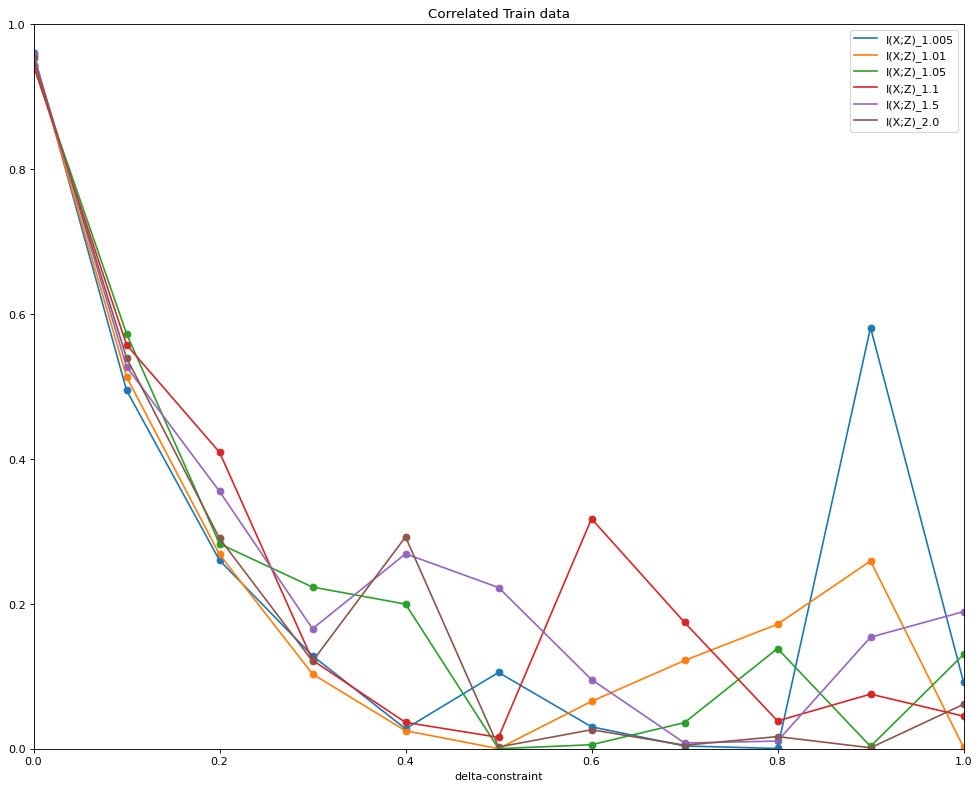

In [34]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

alphas = np.unique(train_uncorrelated_alpha_df['alpha'].to_numpy())#.astype(np.float32).astype(np.int16)
alphas = np.sort(alphas)

def plot_for_all_alphas(df, name):
    for alpha in alphas[:]:
        subframe = df[df['alpha'] == alpha]
        plot_privacy_utility_tradeoff_alphas(plt, subframe, name, str(alpha))
#         plot_distortion(plt, subframe, name, str(alpha))


plot_for_all_alphas(train_correlated_alpha_df, 'Correlated Train')
plt.savefig('binary_alpha_plots_correlated_train.png')

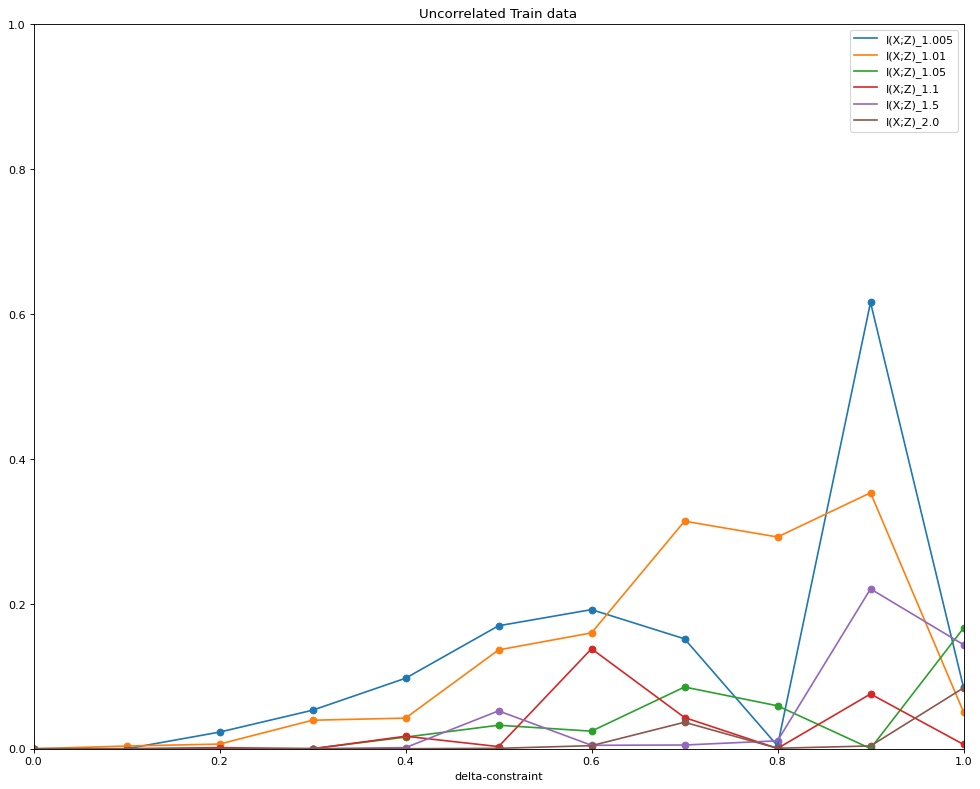

In [35]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plot_for_all_alphas(train_uncorrelated_alpha_df, 'Uncorrelated Train')
plt.savefig('binary_alpha_plots_uncorrelated_train.png')

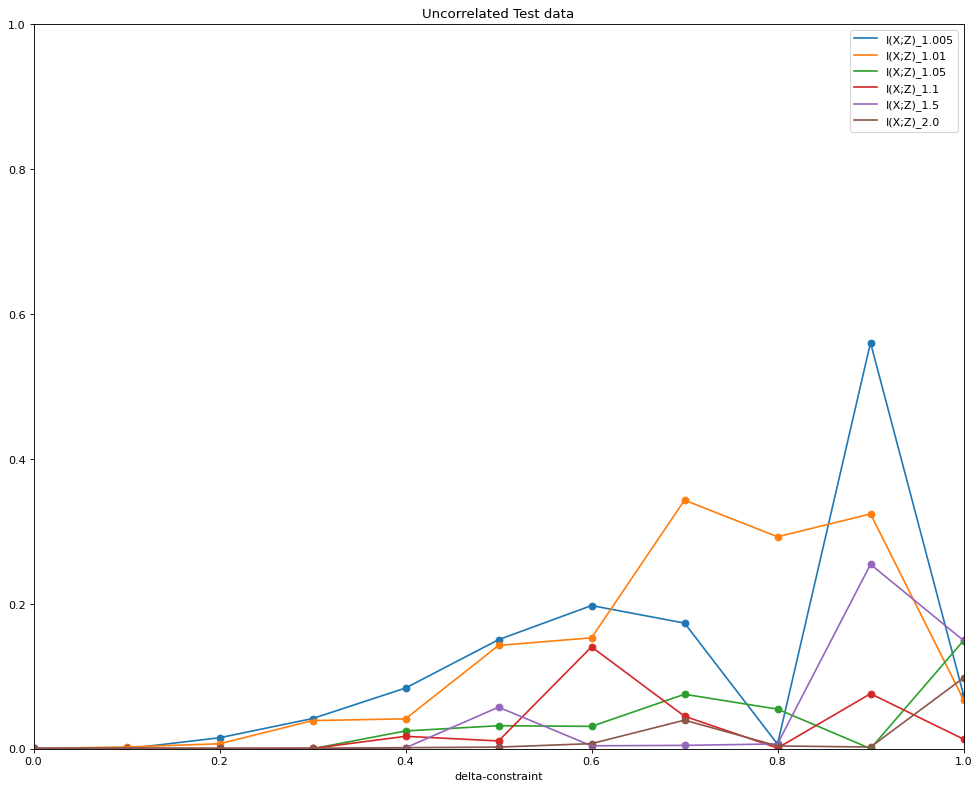

In [36]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plot_for_all_alphas(test_uncorrelated_alpha_df, 'Uncorrelated Test')
plt.savefig('binary_alpha_plots_unorrelated_test.png')

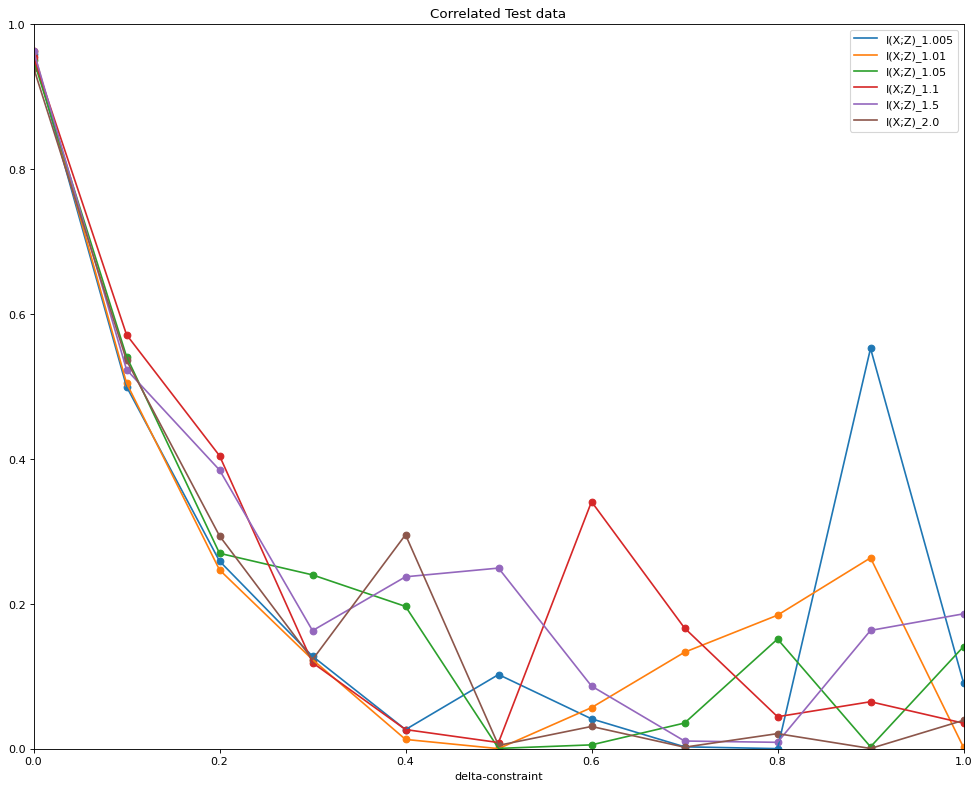

In [37]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')

plot_for_all_alphas(test_correlated_alpha_df, 'Correlated Test')
plt.savefig('binary_alpha_plots_correlated_test.png')

In [38]:
list(file_names_dict['correlated_alpha'][0].keys())

['1.005', '1.01', '1.05', '1.1', '1.5', '2.0']

# Multirun Mutual Information

In [39]:
import numpy as np

def get_deltas_lambdas_rounds(file_name):
    deltas = list(file_names_dict[file_name][0]['1'].keys())
    lambdas = list(file_names_dict[file_name][0]['1'][deltas[0]].keys())
    rounds = list(file_names_dict[file_name][0]['1'][deltas[0]][lambdas[0]].keys())
    return (deltas, lambdas, rounds)

def get_stats_for_file_multi_run(file_name):
    '''
    Only works for Maximal Leakage and Mutual Information result sets. Alpha-Leakage needs other approach.
    '''
    (deltas,lambdas, rounds) = get_deltas_lambdas_rounds(file_name)
    privacy_leakage_train = {}
    public_leakage_train = {}
    distortion_train = {}
    
    privacy_leakage_test = {}
    public_leakage_test = {}
    distortion_test = {}
    
    file_dict = file_names_dict[file_name][0]['1']
    for i in rounds:
        privacy_leakage_train[i] = []
        public_leakage_train[i] = []
        distortion_train[i] = []
        
        privacy_leakage_test[i] = []
        public_leakage_test[i] = []
        distortion_test[i] = []
        
        for delta in deltas:
            try:
                if (int(i) >= 0):
                    privacy_leakage_train[i].append(file_dict[delta][lambdas[0]][i]['train']['I(X;Z)']['actual_out'])
                    public_leakage_train[i].append(file_dict[delta][lambdas[0]][i]['train']['I(Y;Z)']['actual_out'])
                    distortion_train[i].append(file_dict[delta][lambdas[0]][i]['train']['E[hamm(x,y)]']['actual_out'])

                    privacy_leakage_test[i].append(file_dict[delta][lambdas[0]][i]['test']['I(X;Z)']['actual_out'])
                    public_leakage_test[i].append(file_dict[delta][lambdas[0]][i]['test']['I(Y;Z)']['actual_out'])
                    distortion_test[i].append(file_dict[delta][lambdas[0]][i]['test']['E[hamm(x,y)]']['actual_out'])
            except ValueError:
                privacy_leakage_train[i].append(file_dict[delta][lambdas[0]][i]['train_average']['I(X;Z)']['actual_out'])
                public_leakage_train[i].append(file_dict[delta][lambdas[0]][i]['train_average']['I(Y;Z)']['actual_out'])
                distortion_train[i].append(file_dict[delta][lambdas[0]][i]['train_average']['E[hamm(x,y)]']['actual_out'])

                privacy_leakage_test[i].append(file_dict[delta][lambdas[0]][i]['test_average']['I(X;Z)']['actual_out'])
                public_leakage_test[i].append(file_dict[delta][lambdas[0]][i]['test_average']['I(Y;Z)']['actual_out'])
                distortion_test[i].append(file_dict[delta][lambdas[0]][i]['test_average']['E[hamm(x,y)]']['actual_out'])
    
    deltas = np.around(np.array(deltas, dtype=np.double), 2)
    
    for i in rounds:
        privacy_leakage_train[i] = np.array(privacy_leakage_train[i])
        public_leakage_train[i] = np.array(public_leakage_train[i])
        distortion_train[i] = np.array(distortion_train[i])

        privacy_leakage_test[i] = np.array(privacy_leakage_test[i])
        public_leakage_test[i] = np.array(public_leakage_test[i])
        distortion_test[i] = np.array(distortion_test[i])
    
    train_results = {}
    test_results = {}
    for i in rounds:
        train_results[i] = np.c_[deltas, privacy_leakage_train[i], public_leakage_train[i], distortion_train[i]]
        test_results[i] = np.c_[deltas, privacy_leakage_test[i], public_leakage_test[i], distortion_test[i]]
    
    return (
        train_results,
        test_results
    )
    
(train1, test) = get_stats_for_file_multi_run('correlated_mi')
(train2, test) = get_stats_for_file_multi_run('correlated_maxl')

In [40]:
# train1['averages']

In [41]:
# train2['averages']

In [42]:
multi_run_files_mi = [
    'correlated_mi',
    'uncorrelated_mi',
    'random_mi'
]

def get_multi_file_train_test_results(multi_files):
    train_results = {}
    test_results = {}
    for file in multi_files:
        (deltas,lambdas, rounds) = get_deltas_lambdas_rounds(file)
        (train, test) = get_stats_for_file_multi_run(file)    

        train_results[file] = {}
        test_results[file] = {}

        for i in rounds:
            train_results[file][i] = convert_to_pandas(train[i])
            test_results[file][i] = convert_to_pandas(test[i])
            
    return (
        train_results,
        test_results
    )

(train, test) = get_multi_file_train_test_results(multi_run_files_mi)

In [43]:
def plot_privacy(axs, df, name, train_or_test, alpha=1, linestyle='solid'):
    y = df['E[MI_ZX]']
    z = df['delta']

    axs.plot(z,y, label='I(X;Z)_' + train_or_test, alpha=alpha, linestyle=linestyle)

    axs.xlim([0,1])
    axs.ylim([0,1])
    axs.scatter(z,y)

    axs.xlabel('delta-constraint')
    axs.title('{} data'.format(name))
    axs.legend()

def plot_distortion(axs, df, name, train_or_test, alpha=1, linestyle='solid'):
    x = df['E[hamm(x,y)]']
    z = df['delta']

    axs.plot(z,x, label='hamm(Y;Z)_' + train_or_test, alpha=alpha, linestyle=linestyle)
    axs.xlim([0,1])
    axs.ylim([0,1])
    axs.scatter(z,x)
    axs.xlabel('delta-constraint')
    axs.title('{} data'.format(name))
    axs.legend()
    
def plot_multi_files_mi(multi_files, save=False, save_name=None):
    
    def plot_mi_file_stats(file, file_stats, name):
        for r in rounds[:]:
            try:
                if (int(r) >= 0):
                    plot_privacy(plt, file_stats[file][r], file + '_{}'.format(name), 'round_{}'.format(r), alpha=0.5, linestyle='dashed')                    
            except ValueError:
                    plot_privacy(plt, file_stats[file][r], file + '_{}'.format(name), 'average')
                    
        plt.plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
        plt.legend()

        if save and save_name:
            plt.savefig(save_name + '_{}_{}.png'.format(file, name))

        plt.figure()

    (train,test) = get_multi_file_train_test_results(multi_files)
    for file in multi_files:
        (deltas,lambdas, rounds) = get_deltas_lambdas_rounds(file)
        plot_mi_file_stats(file, train, 'train')
        plot_mi_file_stats(file, test, 'test')

        
def plot_multi_files_distortion(multi_files, save=False, save_name=None):
    
    def plot_distortion_file_stats(file, file_stats, name):
        for r in rounds[:]:
            try:
                if (int(r) >= 0):
                    plot_distortion(plt, file_stats[file][r], file + '_{}'.format(name), 'round_{}'.format(r), alpha=0.5, linestyle='dashed')                    
            except ValueError:
                    plot_distortion(plt, file_stats[file][r], file + '_{}'.format(name), 'average')
                    
        plt.plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
        plt.legend()

        if save and save_name:
            plt.savefig(save_name + '_{}_{}.png'.format(file, name))

        plt.figure()
        
    (train,test) = get_multi_file_train_test_results(multi_files)
    for file in multi_files:
        (deltas,lambdas, rounds) = get_deltas_lambdas_rounds(file)
        plot_distortion_file_stats(file, train, 'train')
        plot_distortion_file_stats(file, test, 'test')

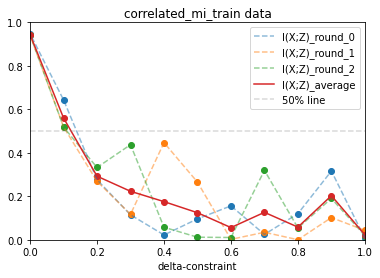

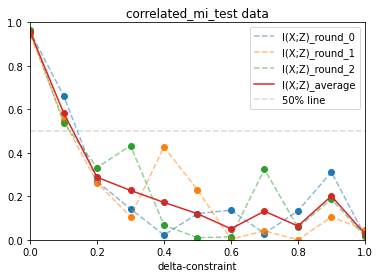

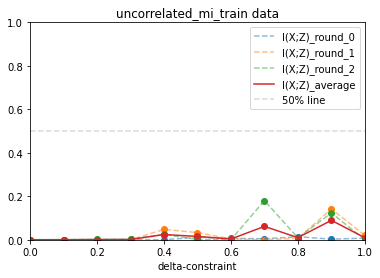

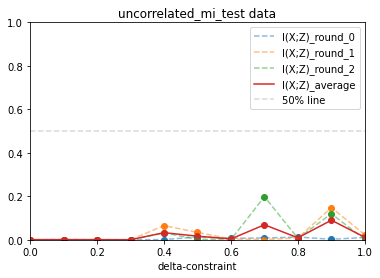

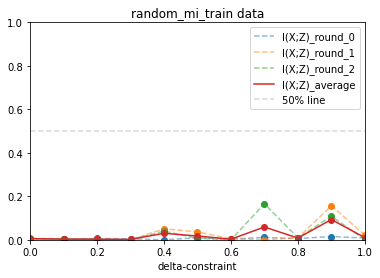

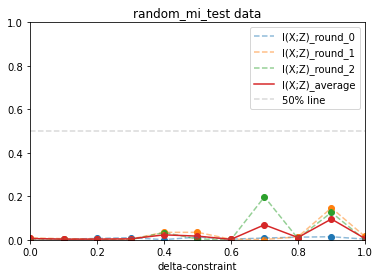

<Figure size 432x288 with 0 Axes>

In [922]:
plot_multi_files_mi([
    'correlated_mi',
    'uncorrelated_mi',
    'random_mi'
], save=False, save_name='binary_mutual_information_l500_rounds_mi')

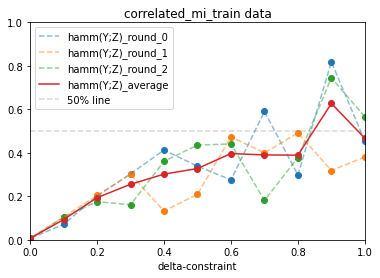

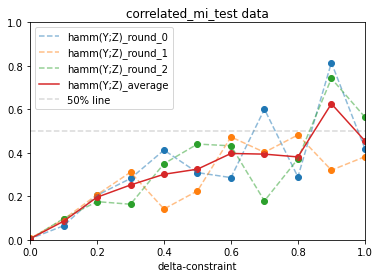

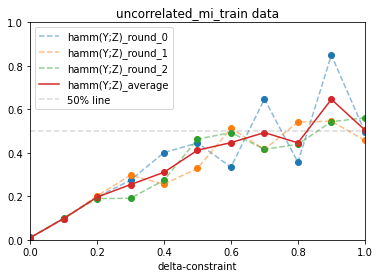

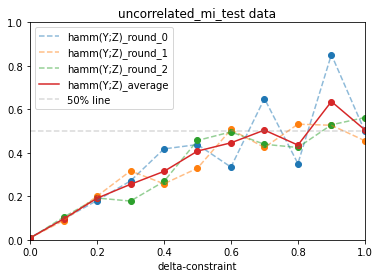

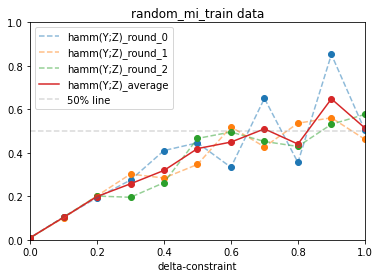

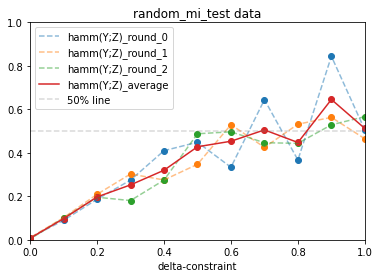

<Figure size 432x288 with 0 Axes>

In [923]:
plot_multi_files_distortion([
    'correlated_mi',
    'uncorrelated_mi',
    'random_mi'
], save=False, save_name='binary_mutual_information_l500_rounds_hamming')

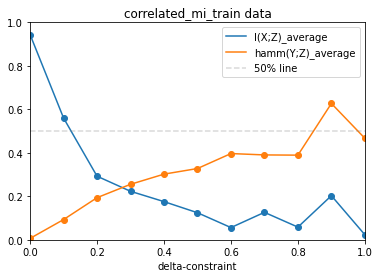

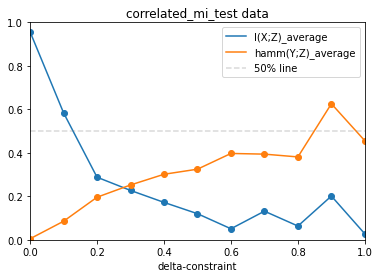

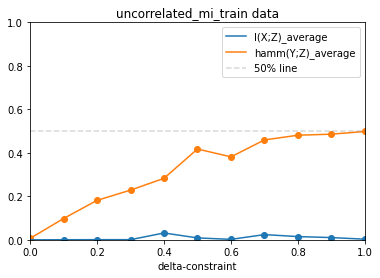

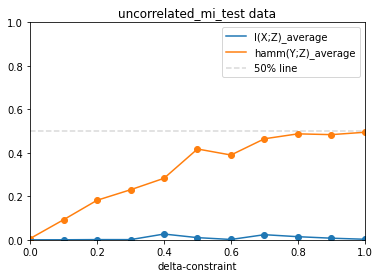

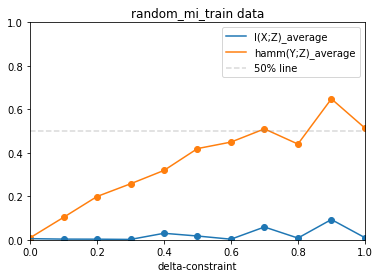

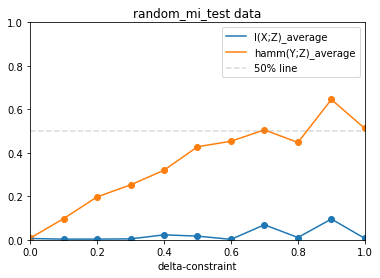

<Figure size 432x288 with 0 Axes>

In [44]:
def plot_privacy_utility_tradeoff_main(axs, df, name, train_or_test, alpha=1, linestyle='solid'):
    x = df['E[hamm(x,y)]']
    y = df['E[MI_ZX]']
    z = df['delta']

    axs.plot(z,y, label='I(X;Z)_' + train_or_test, alpha=alpha, linestyle=linestyle)
    axs.plot(z,x, label='hamm(Y;Z)_' + train_or_test, alpha=alpha, linestyle=linestyle)
    axs.xlim([0,1])
    axs.ylim([0,1])
    axs.scatter(z,y)
    axs.scatter(z,x)
    axs.xlabel('delta-constraint')
    axs.title('{} data'.format(name))
    axs.legend()

def plot_multi_files_averages_mi(multi_files, save=False, save_name=None):
    def plot_averages(file_stats, file, name):        
        plot_privacy_utility_tradeoff_main(plt, file_stats['averages'], file + '_{}'.format(name), 'average')
        plt.plot([0,1],[0.5,0.5], label='50% line', linestyle='dashed', color='grey', alpha=0.3)
        plt.legend()
        
        if save and save_name:
            plt.savefig(save_name + '_{}_{}.png'.format(file, name))

        plt.figure()

    
    (train,test) = get_multi_file_train_test_results(multi_files)
    for i,file in enumerate(multi_files):
        (deltas,lambdas, rounds) = get_deltas_lambdas_rounds(file)
        plot_averages(train[file], file, 'train')
        plot_averages(test[file], file, 'test')

plot_multi_files_averages_mi([
    'correlated_mi',
    'uncorrelated_mi',
    'random_mi'
], save=False, save_name='binary_mutual_information_l500_averages')

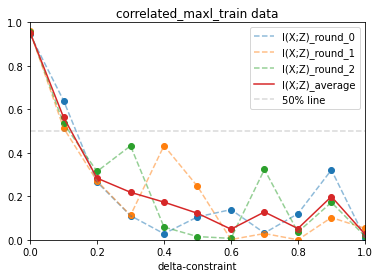

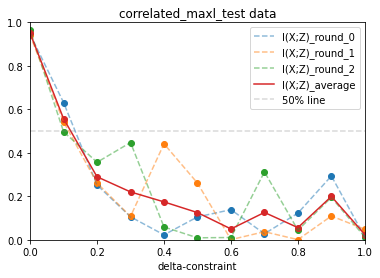

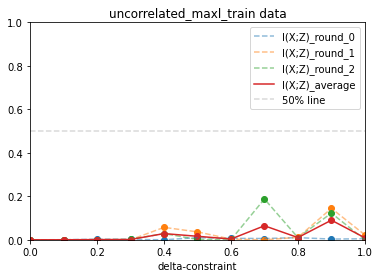

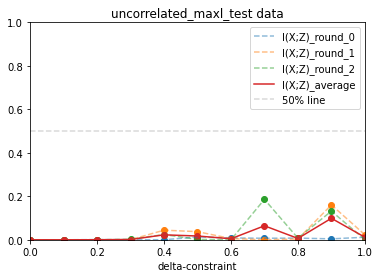

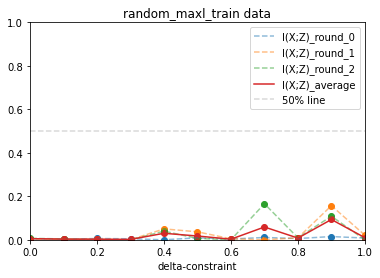

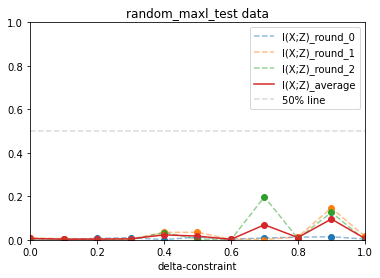

<Figure size 432x288 with 0 Axes>

In [952]:
plot_multi_files_mi([
    'correlated_maxl',
    'uncorrelated_maxl',
    'random_maxl'
], save=True, save_name='binary_mutual_information_l500_rounds_mi')

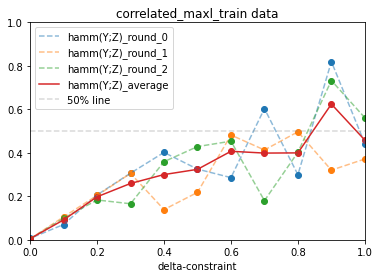

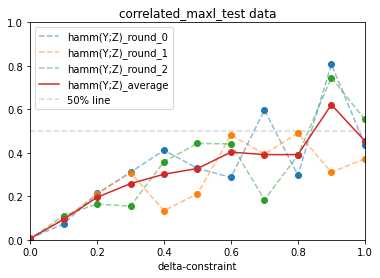

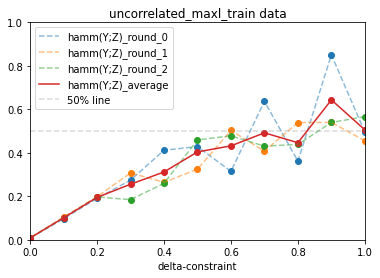

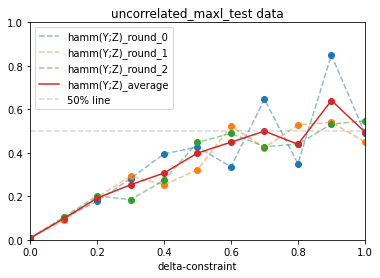

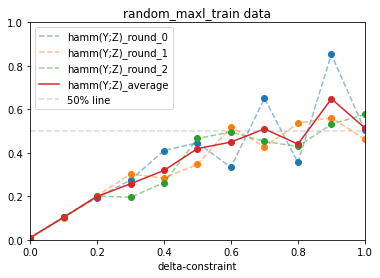

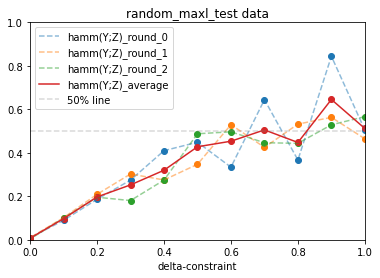

<Figure size 432x288 with 0 Axes>

In [951]:
plot_multi_files_distortion([
    'correlated_maxl',
    'uncorrelated_maxl',
    'random_maxl'
], save=True, save_name='binary_mutual_information_l500_rounds_hamming')

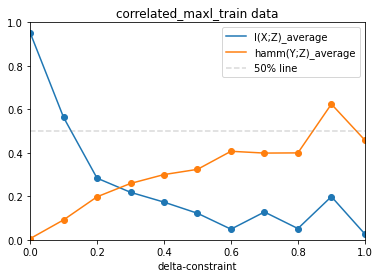

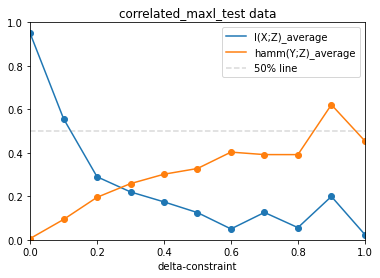

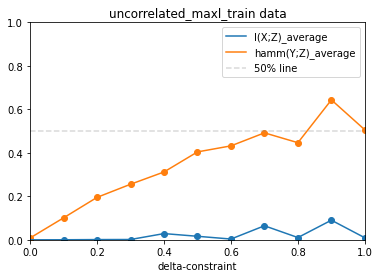

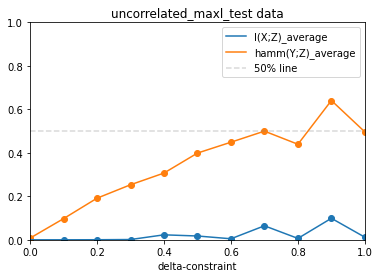

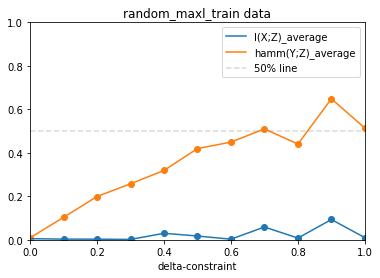

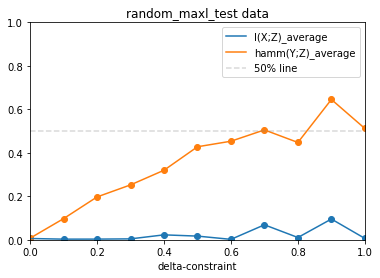

<Figure size 432x288 with 0 Axes>

In [950]:
plot_multi_files_averages_mi([
    'correlated_maxl',
    'uncorrelated_maxl',
    'random_maxl'
], save=True, save_name='binary_mutual_information_l500_averages')

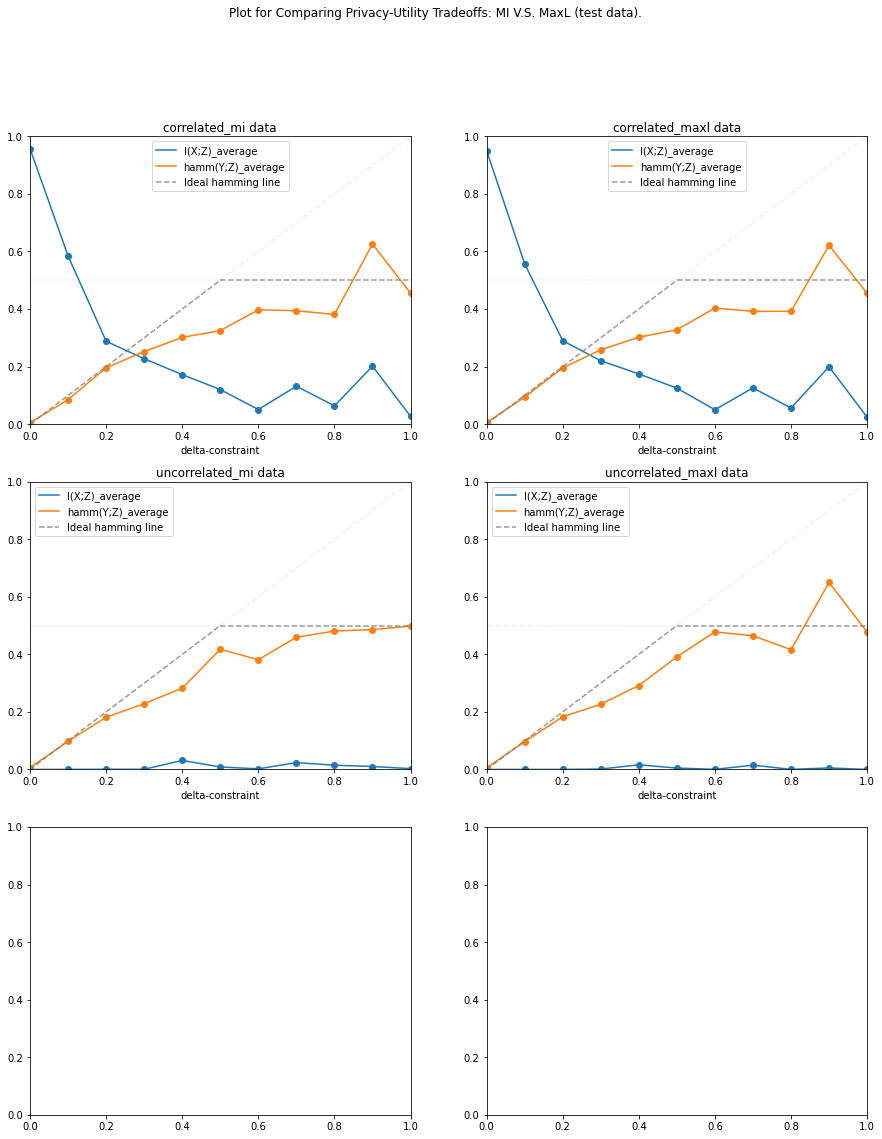

In [92]:
def plot_helpers_correlated_data(plt):
    plt.plot([0,0.5],[0.5,0.5], color='grey', alpha=0.1, linestyle='dashed')
    plt.plot([0.5,1],[0.5,0.5], color='grey', alpha=0.8, linestyle='dashed')
    plt.plot(np.linspace(0, 0.5, 5), np.linspace(0, .5, 5), color='grey', alpha=0.8, linestyle='dashed', label='Ideal hamming line')
    plt.plot(np.linspace(0.5, 1, 5), np.linspace(.5, 1, 5), color='grey', alpha=0.1, linestyle='dashed')
    plt.legend()

fig, axs = plt.subplots(3, 2)
fig.suptitle('Plot for Comparing Privacy-Utility Tradeoffs: MI V.S. MaxL (test data).')
fig.set_figheight(18)
fig.set_figwidth(15)

(train,test) = get_multi_file_train_test_results([
    'correlated_mi',
    'uncorrelated_mi',
    'correlated_maxl',
    'uncorrelated_maxl',
#     'random_mi',
#     'random_maxl',
])

plot_privacy_utility_tradeoff(axs[0,0], test['correlated_mi']['averages'], 'correlated_mi', 'average')
plot_helpers_correlated_data(axs[0,0])
plot_privacy_utility_tradeoff(axs[0,1], test['correlated_maxl']['averages'], 'correlated_maxl', 'average')
plot_helpers_correlated_data(axs[0,1])

plot_privacy_utility_tradeoff(axs[1,0], train['uncorrelated_mi']['averages'], 'uncorrelated_mi', 'average')
plot_helpers_correlated_data(axs[1,0])
plot_privacy_utility_tradeoff(axs[1,1], train['uncorrelated_maxl']['averages'], 'uncorrelated_maxl', 'average')
plot_helpers_correlated_data(axs[1,1])

# plot_privacy_utility_tradeoff(axs[2,0], test['random_mi']['averages'], 'random_mi', 'average')
# plot_privacy_utility_tradeoff(axs[2,1], test['random_maxl']['averages'], 'random_maxl', 'average')

In [978]:
(test['correlated_mi']['averages'] - test['correlated_maxl']['averages']).mean()

delta           0.000000
E[MI_ZX]        0.004497
E[MI_ZY]        0.004497
E[hamm(x,y)]   -0.002545
dtype: float64

In [48]:
(test['uncorrelated_mi']['averages'] - test['uncorrelated_maxl']['averages']).mean()

delta           0.000000
E[MI_ZX]        0.004157
E[MI_ZY]       -0.004662
E[hamm(x,y)]   -0.013746
dtype: float64

In [980]:
(test['random_mi']['averages'] - test['random_maxl']['averages']).mean()

delta           0.000000
E[MI_ZX]        0.000006
E[MI_ZY]        0.000010
E[hamm(x,y)]   -0.000023
dtype: float64

In [66]:
np.linspace(0, 0.5, 10)

array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ])